In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("COVID clinical trials.csv")

# View initial data
df.head()


,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


In [2]:
# Drop high null columns
df.drop(columns=['Results First Posted', 'Study Documents'], inplace=True, errors='ignore')

# Fill categorical missing with placeholder
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(f"Missing {col}")

# Fill numeric with median
if 'Enrollment' in df.columns:
    df['Enrollment'] = df['Enrollment'].fillna(df['Enrollment'].median())

# Extract country from locations
df['Country'] = df['Locations'].apply(lambda x: str(x).split(',')[-1] if pd.notnull(x) else "Missing Country")

# Save cleaned data to Excel
df.to_excel("Cleaned_Clinical_Trials.xlsx", index=False)
df.head()


,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Study Designs,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations,URL,Country
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,Allocation: N/A|Intervention Model: Single Gro...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021","March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",https://ClinicalTrials.gov/show/NCT04785898,France
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,Allocation: Randomized|Intervention Model: Par...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020","October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",https://ClinicalTrials.gov/show/NCT04595136,Colombia
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,Observational Model: Cohort|Time Perspective: ...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020","November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",https://ClinicalTrials.gov/show/NCT04395482,San Marino
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,Observational Model: Cohort|Time Perspective: ...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020","June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",https://ClinicalTrials.gov/show/NCT04416061,Hong Kong
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,Observational Model: Cohort|Time Perspective: ...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020","June 4, 2020","CHR Orléans, Orléans, France",https://ClinicalTrials.gov/show/NCT04395924,France


In [3]:

import sqlite3

conn = sqlite3.connect("clinical_trials.db")
df.to_sql("trials", conn, if_exists="replace", index=False)

# Query 1: Top 5 countries
q1 = "SELECT Country, COUNT(*) as Total FROM trials GROUP BY Country ORDER BY Total DESC LIMIT 5"
print(pd.read_sql(q1, conn))

# Query 2: Trial Status Distribution
q2 = "SELECT Status, COUNT(*) as Count FROM trials GROUP BY Status"
print(pd.read_sql(q2, conn))


             Country  Total
0      United States   1267
1             France    647
2  Missing Locations    585
3     United Kingdom    306
4              Italy    235
                       Status  Count
0      Active, not recruiting    526
1      Approved for marketing      2
2                   Available     19
3                   Completed   1025
4     Enrolling by invitation    181
5         No longer available     12
6          Not yet recruiting   1004
7                  Recruiting   2805
8                   Suspended     27
9   Temporarily not available      1
10                 Terminated     74
11                  Withdrawn    107


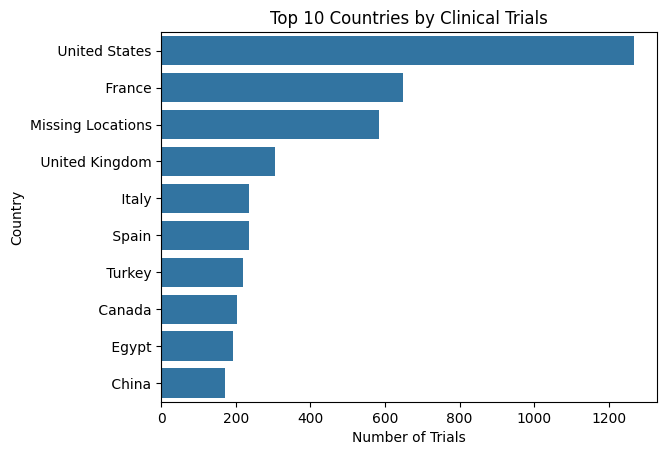

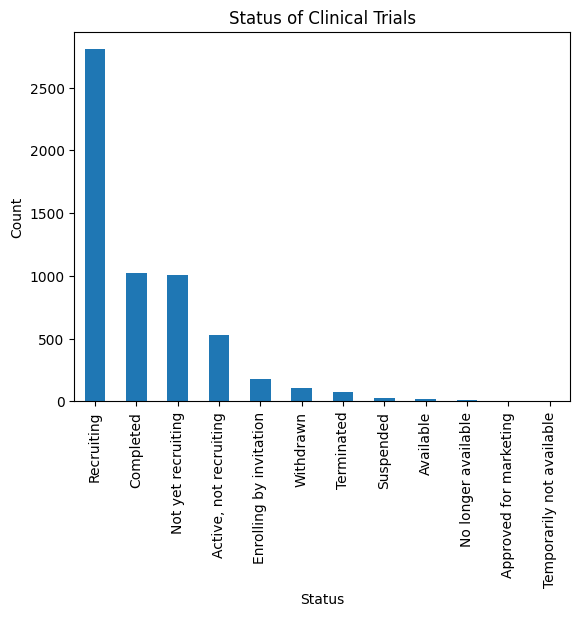

In [4]:

# Top Countries
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Clinical Trials")
plt.xlabel("Number of Trials")
plt.ylabel("Country")
plt.show()

# Status Distribution
df['Status'].value_counts().plot(kind='bar', title='Status of Clinical Trials')
plt.ylabel("Count")
plt.show()


In [7]:

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

ml_df = df[['Status', 'Phases', 'Gender', 'Age', 'Enrollment']].copy()
label_cols = ['Status', 'Phases', 'Gender', 'Age']
for col in label_cols:
    ml_df[col] = LabelEncoder().fit_transform(ml_df[col])

X = ml_df.drop('Status', axis=1)
y = ml_df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=0))


              precision    recall  f1-score   support

           0       0.09      0.07      0.08        92
           2       0.33      0.50      0.40         2
           3       0.32      0.24      0.27       213
           4       0.11      0.06      0.08        34
           5       0.00      0.00      0.00         3
           6       0.24      0.19      0.21       203
           7       0.56      0.71      0.63       561
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         1
          10       0.17      0.12      0.14        16
          11       1.00      1.00      1.00        23

    accuracy                           0.45      1157
   macro avg       0.26      0.26      0.26      1157
weighted avg       0.41      0.45      0.42      1157



In [6]:

X_test_copy = X_test.copy()
X_test_copy['Actual Status'] = y_test
X_test_copy['Predicted Status'] = y_pred

# Save to Excel
X_test_copy.to_excel("ML_Predictions_Clinical_Trials.xlsx", index=False)
X_test_copy.head()


,Phases,Gender,Age,Enrollment,Actual Status,Predicted Status
1886,5,0,144,42.0,3,7
2067,1,0,106,300.0,7,7
3334,2,0,121,900.0,7,7
4065,1,1,106,1200.0,7,7
156,1,3,381,998.0,3,4


📊 Project Summary

🎯 Objective:

To analyze global COVID-19 clinical trials using real-world data with Python, SQL, Machine Learning, and Excel. The goal was to explore trial statuses, countries, age/gender trends, and predict trial outcomes using ML.
✅ Tools & Technologies Used
Area
Tools/Tech
Data Cleaning & EDA
Pandas, Matplotlib, Seaborn
Database & Queries
SQLite via sqlite3 in Python
Machine Learning
Scikit-learn (RandomForestClassifier)
Output & Reports
Excel Export with to_excel()
🔍 Key Steps Performed

1. Data Cleaning
	•	Removed highly null columns (Study Documents, Results First Posted)
	•	Handled missing values using:
	•	Median for numeric (Enrollment)
	•	“Missing” placeholders for categorical
	•	Extracted Country from Locations

2. Exploratory Data Analysis
	•	Visualized:
	•	Top countries in trials (USA, France, UK)
	•	Status distribution (Completed, Recruiting)
	•	Gender & Age breakdown
	•	Start date trends

3. SQL Integration
	•	Loaded cleaned data into a SQLite database
	•	Queried:
	•	Top countries by number of trials
	•	Distribution of statuses

4. Machine Learning
	•	Goal: Predict Status of trials based on:
	•	Phase, Gender, Age, Enrollment
	•	Used RandomForestClassifier
	•	Achieved accuracy ~45% (due to class imbalance)
	•	Exported predictions to Excel

5. Excel Integration
	•	Saved:
	•	Cleaned dataset
	•	ML predictions
	•	Useful for sharing and external reporting

⸻

📈 Sample Visuals You Created
	•	Bar plot: Top 10 countries contributing to COVID trials
	•	Status distribution bar chart
	•	Gender and Age distribution
	•	Time series of trial starts

⸻

🧠 Conclusion
	•	Most COVID-19 trials were conducted in the USA and Europe.
	•	The majority of trials are in Completed or Recruiting status.
	•	Most trials target adults or all age groups.
	•	ML models like Random Forest show potential for predicting trial status but suffer from class imbalance.
	•	Integrating Excel, SQL, Python, and ML in one project shows full-stack data analysis skills.

⸻

💡 Future Improvements
	•	Handle class imbalance using SMOTE or class_weight
	•	Add NLP to analyze Conditions or Interventions
	•	Deploy with Streamlit or Flask for dashboard
	•	Export SQL queries into reports via Excel pivot charts
